# TIME SERIES ANALYSIS 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading Sales Data

In [2]:
df1=pd.read_csv(r"C:\Users\Nagaraj Nagappan\Desktop\MLFlow2\CSV\Sale.csv")
df1.head()

,Store,Sales Date Time,Product,Gallons
0,Jumbo 663,2020-02-18 23:00:00.000,DSL,0.0
1,Jumbo 663,2020-02-18 22:00:00.000,DSL,0.0
2,Jumbo 663,2020-02-18 21:00:00.000,DSL,0.0
3,Jumbo 663,2020-02-18 20:00:00.000,DSL,0.0
4,Jumbo 663,2020-02-18 19:00:00.000,DSL,0.0


In [3]:
df1.columns

Index(['Store', 'Sales  Date Time', 'Product', 'Gallons'], dtype='object')

In [4]:
# result_df.to_csv("Sales_Data.csv", index=False)

In [5]:

df1['Sales  Date Time'] = pd.to_datetime(df1['Sales  Date Time'])

# Group by date and sum the sales
daily_sales = df1.groupby(df1['Sales  Date Time'].dt.date)['Gallons'].sum().reset_index()

daily_sales



,Sales Date Time,Gallons
0,2018-02-17,13005.65
1,2018-02-18,10540.88
2,2018-02-19,23375.02
3,2018-02-20,30294.14
4,2018-02-21,28389.64
...,...,...
727,2020-02-14,26200.32
728,2020-02-15,14337.40
729,2020-02-16,13831.14
730,2020-02-17,24681.67


In [6]:
daily_sales.columns

Index(['Sales  Date Time', 'Gallons'], dtype='object')

In [7]:
daily_sales.rename(columns={'Sales  Date Time': 'Date', 'Gallons': 'Total_sales'}, inplace=True)

In [8]:
daily_sales.to_csv("daily_sales.csv", index=False)

# Loading Inventory

In [9]:
df2=pd.read_csv(r"C:\Users\Nagaraj Nagappan\Desktop\MLFlow2\CSV\Inventory.csv")
df2.head()

,Store,Inventory Date Time,Product,Gross Volume,Net Volume,Temperature
0,Jumbo 663,2020-02-18 18:54:06.000,DSL,44170.407,44343.433,51.455000
1,Jumbo 663,2020-02-18 17:58:56.000,DSL,38467.099,38608.045,51.754666
2,Jumbo 663,2020-02-18 16:59:56.000,DSL,39817.805,39965.802,51.637333
3,Jumbo 663,2020-02-18 15:59:46.000,DSL,41719.167,41876.872,51.523000
4,Jumbo 663,2020-02-18 14:59:26.000,DSL,42936.285,43100.954,51.395000


In [10]:
df2['Inventory Date Time'] = pd.to_datetime(df2['Inventory Date Time'])

# Find the index of the minimum 'Inventory Date Time' for each date
min_starting_indices = df2.groupby(df2['Inventory Date Time'].dt.date)['Inventory Date Time'].idxmin()

# Use the indices to fetch the corresponding rows
min_starting_data = df2.loc[min_starting_indices, ['Inventory Date Time', 'Gross Volume']]


In [11]:
# Extract the date and store it in a new column called 'Date'
min_starting_data['Date'] = min_starting_data['Inventory Date Time'].dt.date


In [12]:
min_starting_data

,Inventory Date Time,Gross Volume,Date
5872,2019-06-19 00:58:47,33981.120,2019-06-19
5848,2019-06-20 00:57:37,41851.722,2019-06-20
5824,2019-06-21 00:59:47,44027.074,2019-06-21
5800,2019-06-22 00:59:56,24683.161,2019-06-22
5776,2019-06-23 00:56:37,34343.323,2019-06-23
...,...,...,...
114,2020-02-14 00:56:06,46732.590,2020-02-14
90,2020-02-15 00:59:56,36242.992,2020-02-15
66,2020-02-16 00:59:36,37726.489,2020-02-16
42,2020-02-17 00:59:16,39473.070,2020-02-17


In [13]:
min_starting_data = min_starting_data.drop(columns=['Inventory Date Time'], errors='ignore')

In [14]:
min_starting_data

,Gross Volume,Date
5872,33981.120,2019-06-19
5848,41851.722,2019-06-20
5824,44027.074,2019-06-21
5800,24683.161,2019-06-22
5776,34343.323,2019-06-23
...,...,...
114,46732.590,2020-02-14
90,36242.992,2020-02-15
66,37726.489,2020-02-16
42,39473.070,2020-02-17


In [15]:
min_starting_data.to_csv("Inventory_Data.csv", index=False)

## Loading Delivery_data

In [16]:
df3=pd.read_csv(r"C:\Users\Nagaraj Nagappan\Desktop\MLFlow2\CSV\Store Product Delivery.csv")
df3.head()

,OrderItemId,Store,Product,Gallons,Delivered Date Time
0,5395535,Jumbo 663,DSL,7500,NaN
1,5395534,Jumbo 663,DSL,7570,NaN
2,5395533,Jumbo 663,DSL,7740,NaN
3,5395473,Jumbo 663,DSL,7740,NaN
4,5390709,Jumbo 663,DSL,7590,NaN


In [17]:
df3=df3.dropna()

In [18]:
df3

,OrderItemId,Store,Product,Gallons,Delivered Date Time
7,5390700,Jumbo 663,DSL,7650,2020-02-20 07:42:39.3733333
9,5390698,Jumbo 663,DSL,7650,2020-02-20 08:19:46.9900000
12,5386179,Jumbo 663,DSL,7700,2020-02-19 19:42:08.2166667
16,5385972,Jumbo 663,DSL,7770,2020-02-19 13:05:18.1800000
17,5385971,Jumbo 663,DSL,7770,2020-02-19 10:30:03.8200000
...,...,...,...,...,...
2200,2035133,Jumbo 663,DSL,7500,2018-09-21 04:27:21.9900000
2201,2034988,Jumbo 663,DSL,7500,2018-09-20 21:48:28.7333333
2202,2034987,Jumbo 663,DSL,7500,2018-09-20 23:15:00.0000000
2203,2033652,Jumbo 663,DSL,7590,2018-09-20 13:31:02.3366667


In [19]:


df3['Delivered Date Time'] = pd.to_datetime(df3['Delivered Date Time'])

# Extract date from 'Delivered Date Time' and add it to the DataFrame
df3['Date'] = df3['Delivered Date Time'].dt.date

# Group by date and aggregate both sum and count
grouped_df = df3.groupby('Date')['Gallons'].agg(['sum', 'count']).reset_index()

# Rename the columns for clarity
grouped_df.columns = ['Date', 'Total Gallons', 'Count of Gallons']




In [20]:
grouped_df

,Date,Total Gallons,Count of Gallons
0,2018-09-20,30240,4
1,2018-09-21,22500,3
2,2018-09-22,7500,1
3,2018-09-23,7650,1
4,2018-09-24,22860,3
...,...,...,...
502,2020-02-16,15395,2
503,2020-02-17,22800,3
504,2020-02-18,30260,4
505,2020-02-19,30895,4


In [21]:
grouped_df.to_csv("Delivery_Data.csv", index=False)

### Merging

In [22]:
result_df = pd.merge(daily_sales, min_starting_data, on='Date', how='left')

result_df = pd.merge(result_df, grouped_df, on='Date', how='left')



In [23]:
result_df

,Date,Total_sales,Gross Volume,Total Gallons,Count of Gallons
0,2018-02-17,13005.65,NaN,NaN,NaN
1,2018-02-18,10540.88,NaN,NaN,NaN
2,2018-02-19,23375.02,NaN,NaN,NaN
3,2018-02-20,30294.14,NaN,NaN,NaN
4,2018-02-21,28389.64,NaN,NaN,NaN
...,...,...,...,...,...
727,2020-02-14,26200.32,46732.590,15390.0,2.0
728,2020-02-15,14337.40,36242.992,15340.0,2.0
729,2020-02-16,13831.14,37726.489,15395.0,2.0
730,2020-02-17,24681.67,39473.070,22800.0,3.0


In [24]:
result_df.rename(columns={'Gross Volume': 'Inventory', 'Total Gallons': 'Total_Delivery','Count of Gallons':'Truck_load'}, inplace=True)

In [25]:
result_df["Date"] = pd.to_datetime(result_df["Date"])


In [26]:
result_df

,Date,Total_sales,Inventory,Total_Delivery,Truck_load
0,2018-02-17,13005.65,NaN,NaN,NaN
1,2018-02-18,10540.88,NaN,NaN,NaN
2,2018-02-19,23375.02,NaN,NaN,NaN
3,2018-02-20,30294.14,NaN,NaN,NaN
4,2018-02-21,28389.64,NaN,NaN,NaN
...,...,...,...,...,...
727,2020-02-14,26200.32,46732.590,15390.0,2.0
728,2020-02-15,14337.40,36242.992,15340.0,2.0
729,2020-02-16,13831.14,37726.489,15395.0,2.0
730,2020-02-17,24681.67,39473.070,22800.0,3.0


# Temperature Data

In [27]:
df4=pd.read_csv(r"C:\Users\Nagaraj Nagappan\Desktop\MLFlow2\weather_data.csv")
df4

,Unnamed: 0,Date,Temp-F
0,0,2019-06-01,75.5
1,1,2019-06-02,77.5
2,2,2019-06-03,80.0
3,3,2019-06-04,78.5
4,4,2019-06-05,79.0
...,...,...,...
269,269,2020-02-25,59.0
270,270,2020-02-26,50.0
271,271,2020-02-27,43.0
272,272,2020-02-28,43.5


In [28]:
df4["Date"] = pd.to_datetime(df4["Date"])


In [29]:
df4.columns = df4.columns.str.replace('\t', '')

# Drop the column without the tab character
df4 = df4.drop(["Unnamed: 0"], axis=1)

In [30]:
df4

,Date,Temp-F
0,2019-06-01,75.5
1,2019-06-02,77.5
2,2019-06-03,80.0
3,2019-06-04,78.5
4,2019-06-05,79.0
...,...,...
269,2020-02-25,59.0
270,2020-02-26,50.0
271,2020-02-27,43.0
272,2020-02-28,43.5


# MERGing whole  DATA

In [31]:
Final_df = pd.merge(result_df,df4, on='Date', how='left')
Final_df

,Date,Total_sales,Inventory,Total_Delivery,Truck_load,Temp-F
0,2018-02-17,13005.65,NaN,NaN,NaN,NaN
1,2018-02-18,10540.88,NaN,NaN,NaN,NaN
2,2018-02-19,23375.02,NaN,NaN,NaN,NaN
3,2018-02-20,30294.14,NaN,NaN,NaN,NaN
4,2018-02-21,28389.64,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
727,2020-02-14,26200.32,46732.590,15390.0,2.0,49.0
728,2020-02-15,14337.40,36242.992,15340.0,2.0,45.0
729,2020-02-16,13831.14,37726.489,15395.0,2.0,40.5
730,2020-02-17,24681.67,39473.070,22800.0,3.0,49.5


# Data Cleaning

In [32]:
Final_df.isnull().sum()

Date                0
Total_sales         0
Inventory         487
Total_Delivery    227
Truck_load        227
Temp-F            469
dtype: int64

In [33]:
Final_df=Final_df.dropna()

In [34]:
Final_df

,Date,Total_sales,Inventory,Total_Delivery,Truck_load,Temp-F
487,2019-06-19,30613.47,33981.120,30550.0,4.0,78.5
488,2019-06-20,27402.34,41851.722,37880.0,5.0,79.0
489,2019-06-21,27458.89,44027.074,7770.0,1.0,80.5
490,2019-06-22,13303.20,24683.161,22830.0,3.0,79.0
491,2019-06-23,11559.55,34343.323,7700.0,1.0,80.0
...,...,...,...,...,...,...
727,2020-02-14,26200.32,46732.590,15390.0,2.0,49.0
728,2020-02-15,14337.40,36242.992,15340.0,2.0,45.0
729,2020-02-16,13831.14,37726.489,15395.0,2.0,40.5
730,2020-02-17,24681.67,39473.070,22800.0,3.0,49.5


In [35]:
Final_df.describe()

,Date,Total_sales,Inventory,Total_Delivery,Truck_load,Temp-F
count,240,240.000000,240.000000,240.00000,240.000000,240.000000
mean,2019-10-19 07:36:00,25466.627250,36194.283754,25459.41250,3.354167,65.293333
min,2019-06-19 00:00:00,5468.680000,14928.213000,7500.00000,1.000000,32.000000
25%,2019-08-18 18:00:00,16102.697500,32578.856500,15427.50000,2.000000,51.000000
50%,2019-10-19 12:00:00,27243.320000,35870.456000,23065.00000,3.000000,66.000000
75%,2019-12-20 06:00:00,32203.260000,40150.849000,30720.00000,4.000000,80.625000
max,2020-02-18 00:00:00,40479.680000,50285.680000,60880.00000,8.000000,86.000000
std,NaN,8408.015554,5869.965831,10368.44369,1.370484,15.377336


# WEB SCRAPING


#### fetched temperature of calfornia

In [36]:
# import json
# import requests
# BASE_URL="https://www.ncei.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=TMAX&limit=1000&locationid=FIPS:06&startdate=2019-06-19&enddate=2020-02-18"
# token = "ELmJPCoOZPikKArzYDAKhkhXxNEfTxSY"

# auth_re3= requests.get(BASE_URL, headers={"token":token})
# tmax=auth_re3.json()
# tmax=tmax["results"]
# save_file = open("tmax.json", "w")  
# json.dump(tmax, save_file)  
# save_file.close()
# j3=pd.read_json('tmax.json')
# j3=pd.DataFrame(j3)
# j3

In [37]:
# BASE_URL="https://www.ncei.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=TMin&limit=1000&locationid=ZIP:28801&startdate=2019-06-19&enddate=2020-02-18"
# token = "ELmJPCoOZPikKArzYDAKhkhXxNEfTxSY"

# auth_re3= requests.get(BASE_URL, headers={"token":token})
# tmin=auth_re3.json()
# tmin=tmin["results"]
# save_file = open("tmin.json", "w")  
# json.dump(tmin, save_file)  
# save_file.close()
# j4=pd.read_json('tmin.json')
# j4=pd.DataFrame(j4)
# j4

In [38]:
# Scraped_Temp_Data=j3.merge(j4,on='date')
# Scraped_Temp_Data

In [39]:

# Scraped_Temp_Data['Temperature Average'] = (Scraped_Temp_Data['value_x'] + Scraped_Temp_Data['value_y']) / 2
# Scraped_Temp_Data

In [40]:
# Scraped_Temp_Data = Scraped_Temp_Data[['date', 'Temperature Average']]
# Scraped_Temp_Data.rename(columns={'date': 'Date'}, inplace=True)

In [41]:
# Scraped_Temp_Data

In [42]:
# Scraped_Temp_Data.to_csv("Average.csv",index=False)

In [43]:
# # Final_df = pd.merge(result_df, Scraped_Temp_Data, on='Date', how='left')
# # Final_df

# result_df['Date'] = pd.to_datetime(result_df['Date'])
# Scraped_Temp_Data['Date'] = pd.to_datetime(Scraped_Temp_Data['Date'])

# Final_df = pd.merge(result_df, Scraped_Temp_Data, on='Date', how='left')


In [44]:
# Final_df

# EDA_FINAL_DATA

In [45]:
import pandas as pd
import matplotlib.pyplot as plt


#### SALES DIFFERENCE

In [46]:
Final_df['Date'] = pd.to_datetime(Final_df['Date'])
daily_variation = Final_df['Total_sales'].diff()
daily_variation = daily_variation.fillna(0)
Final_df['Daily_Variation'] = daily_variation.astype(int)
Final_df



C:\Users\Nagaraj Nagappan\AppData\Local\Temp\ipykernel_14048\4119204683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_df['Date'] = pd.to_datetime(Final_df['Date'])
C:\Users\Nagaraj Nagappan\AppData\Local\Temp\ipykernel_14048\4119204683.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_df['Daily_Variation'] = daily_variation.astype(int)


,Date,Total_sales,Inventory,Total_Delivery,Truck_load,Temp-F,Daily_Variation
487,2019-06-19,30613.47,33981.120,30550.0,4.0,78.5,0
488,2019-06-20,27402.34,41851.722,37880.0,5.0,79.0,-3211
489,2019-06-21,27458.89,44027.074,7770.0,1.0,80.5,56
490,2019-06-22,13303.20,24683.161,22830.0,3.0,79.0,-14155
491,2019-06-23,11559.55,34343.323,7700.0,1.0,80.0,-1743
...,...,...,...,...,...,...,...
727,2020-02-14,26200.32,46732.590,15390.0,2.0,49.0,-5633
728,2020-02-15,14337.40,36242.992,15340.0,2.0,45.0,-11862
729,2020-02-16,13831.14,37726.489,15395.0,2.0,40.5,-506
730,2020-02-17,24681.67,39473.070,22800.0,3.0,49.5,10850


### PROFIT/LOSS


In [47]:
def classify_variation(daily_variation):

  if daily_variation > 0:
    return "positive"
  elif daily_variation < 0:
    return "negative"
  else:
    return "neutral"

Final_df["Variation_Type"] = Final_df["Daily_Variation"].apply(classify_variation)


Final_df


C:\Users\Nagaraj Nagappan\AppData\Local\Temp\ipykernel_14048\2131307207.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_df["Variation_Type"] = Final_df["Daily_Variation"].apply(classify_variation)


,Date,Total_sales,Inventory,Total_Delivery,Truck_load,Temp-F,Daily_Variation,Variation_Type
487,2019-06-19,30613.47,33981.120,30550.0,4.0,78.5,0,neutral
488,2019-06-20,27402.34,41851.722,37880.0,5.0,79.0,-3211,negative
489,2019-06-21,27458.89,44027.074,7770.0,1.0,80.5,56,positive
490,2019-06-22,13303.20,24683.161,22830.0,3.0,79.0,-14155,negative
491,2019-06-23,11559.55,34343.323,7700.0,1.0,80.0,-1743,negative
...,...,...,...,...,...,...,...,...
727,2020-02-14,26200.32,46732.590,15390.0,2.0,49.0,-5633,negative
728,2020-02-15,14337.40,36242.992,15340.0,2.0,45.0,-11862,negative
729,2020-02-16,13831.14,37726.489,15395.0,2.0,40.5,-506,negative
730,2020-02-17,24681.67,39473.070,22800.0,3.0,49.5,10850,positive


##### HOLIDAYS 

In [48]:
holidays = ['2019-07-04', '2019-09-02', '2019-11-29', '2019-12-25', '2020-01-01', '2020-02-14', '2020-02-17']
Final_df['Special_Holiday'] = Final_df.index.isin(pd.to_datetime(holidays)).astype(int)
Final_df.head()


C:\Users\Nagaraj Nagappan\AppData\Local\Temp\ipykernel_14048\124082254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_df['Special_Holiday'] = Final_df.index.isin(pd.to_datetime(holidays)).astype(int)


,Date,Total_sales,Inventory,Total_Delivery,Truck_load,Temp-F,Daily_Variation,Variation_Type,Special_Holiday
487,2019-06-19,30613.47,33981.120,30550.0,4.0,78.5,0,neutral,0
488,2019-06-20,27402.34,41851.722,37880.0,5.0,79.0,-3211,negative,0
489,2019-06-21,27458.89,44027.074,7770.0,1.0,80.5,56,positive,0
490,2019-06-22,13303.20,24683.161,22830.0,3.0,79.0,-14155,negative,0
491,2019-06-23,11559.55,34343.323,7700.0,1.0,80.0,-1743,negative,0


In [49]:
Final_df.columns

Index(['Date', 'Total_sales', 'Inventory', 'Total_Delivery', 'Truck_load',
       'Temp-F', 'Daily_Variation', 'Variation_Type', 'Special_Holiday'],
      dtype='object')

### WEEK DAYS AND WEEKENDS

In [50]:
Final_df.loc[:, 'Week/weekend'] = (Final_df['Date'].dt.dayofweek >= 5).astype(int)


C:\Users\Nagaraj Nagappan\AppData\Local\Temp\ipykernel_14048\4071822436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_df.loc[:, 'Week/weekend'] = (Final_df['Date'].dt.dayofweek >= 5).astype(int)


In [51]:
Final_df['Truck_load'] = Final_df['Truck_load'].astype(int)


Final_df['Gallons_Left'] = Final_df['Inventory'] - Final_df['Total_sales']

C:\Users\Nagaraj Nagappan\AppData\Local\Temp\ipykernel_14048\769498261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_df['Truck_load'] = Final_df['Truck_load'].astype(int)
C:\Users\Nagaraj Nagappan\AppData\Local\Temp\ipykernel_14048\769498261.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_df['Gallons_Left'] = Final_df['Inventory'] - Final_df['Total_sales']


##### Weather_Condition'

In [105]:
# Convert Fahrenheit to Celsius
Final_df['Temp-C'] = (Final_df['Temp-F'] - 32) * 5/9

# Define temperature ranges for each season in Celsius
spring_range = (15.5556, 21.1111)
summer_range = (21.1111, 30.000000)
fall_range = (10, 15.5556)
winter_range = (-1.1111, 10)

# Function to classify temperature into seasons
def classify_season(temp):
    if temp >= summer_range[0] and temp < summer_range[1]:
        return 'Summer'
    elif temp >= spring_range[0] and temp < spring_range[1]:
        return 'Spring'
    elif temp >= fall_range[0] and temp < fall_range[1]:
        return 'Fall'
    elif temp >= winter_range[0] and temp < winter_range[1]:
        return 'Winter'
    else:
        return 'Unknown'

# Apply the function to create a new 'Season' column
Final_df['Season'] = Final_df['Temp-C'].apply(classify_season)

C:\Users\Nagaraj Nagappan\AppData\Local\Temp\ipykernel_14048\938272560.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nagaraj Nagappan\AppData\Local\Temp\ipykernel_14048\938272560.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [106]:
Final_df

,Date,Total_sales,Inventory,Total_Delivery,Truck_load,Temp-F,Daily_Variation,Variation_Type,Special_Holiday,Week/weekend,Gallons_Left,Temp-C,Season,Month
487,2019-06-19,30613.47,33981.120,30550.0,4,78.5,0,neutral,0,0,3367.650,25.833333,Summer,June
488,2019-06-20,27402.34,41851.722,37880.0,5,79.0,-3211,negative,0,0,14449.382,26.111111,Summer,June
489,2019-06-21,27458.89,44027.074,7770.0,1,80.5,56,positive,0,0,16568.184,26.944444,Summer,June
490,2019-06-22,13303.20,24683.161,22830.0,3,79.0,-14155,negative,0,1,11379.961,26.111111,Summer,June
491,2019-06-23,11559.55,34343.323,7700.0,1,80.0,-1743,negative,0,1,22783.773,26.666667,Summer,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,2020-02-14,26200.32,46732.590,15390.0,2,49.0,-5633,negative,0,0,20532.270,9.444444,Winter,February
728,2020-02-15,14337.40,36242.992,15340.0,2,45.0,-11862,negative,0,1,21905.592,7.222222,Winter,February
729,2020-02-16,13831.14,37726.489,15395.0,2,40.5,-506,negative,0,1,23895.349,4.722222,Winter,February
730,2020-02-17,24681.67,39473.070,22800.0,3,49.5,10850,positive,0,0,14791.400,9.722222,Winter,February


In [55]:
Final_df.to_csv("Final_Merged_Data.csv",index=False)

# METRICS

#### AVERAGE_SALES

In [56]:
total_sales_mean = Final_df['Total_sales'].mean()
print("Daily Average Sales of Gallons: ",total_sales_mean)

Daily Average Sales of Gallons:  25466.62725


#### AVERAGE GALLONS STORED

In [57]:
inventory_mean = Final_df['Inventory'].mean()
print("Average Gallons Stored : ",inventory_mean)

Average Gallons Stored :  36194.28375416667


#### AVERAGE GALLONS DELIVERED TO THE STATION

In [58]:
delivery_mean = Final_df['Total_Delivery'].mean()
print("AVERAGE GALLONS DELIVERED TO THE STATION : ",delivery_mean)

AVERAGE GALLONS DELIVERED TO THE STATION :  25459.4125


#### AVERAGE LOAD CAME

In [59]:
import math

truck_load_mean = Final_df['Truck_load'].mean()

# Round down to the nearest integer
rounded_truck_load_mean = math.floor(truck_load_mean)

# Display the result
print(f"Average Truck Load: {rounded_truck_load_mean}")


Average Truck Load: 3


### AVERAGE TEMPERATURE(kelvin)

In [60]:
temperature_avg_mean = Final_df['Temp-C'].mean()
print(f"Average Temperature: {temperature_avg_mean}")


Average Temperature: 18.496296296296297


### AVERAGE GALLOON LEFT



In [61]:
gallons_left_mean = Final_df['Gallons_Left'].mean()

print(f"Average Gallons Left: {gallons_left_mean}")

Average Gallons Left: 10727.656504166665


# HIGHEST SALE 

In [62]:
max_sales_row = Final_df.loc[Final_df['Total_sales'].idxmax()]

max_sales_date = max_sales_row['Date']
max_sales_value = max_sales_row['Total_sales']
WEEK_WEEKEND=max_sales_row["Week/weekend"]
special_day=max_sales_row["Special_Holiday"]

print(f"Max Sales Date: {max_sales_date}, Max Sales Value: {max_sales_value},Weekorweekend : {WEEK_WEEKEND},Special_Holiday : {special_day}")

Max Sales Date: 2020-01-21 00:00:00, Max Sales Value: 40479.68,Weekorweekend : 0,Special_Holiday : 0


# Data Visualisation
# Total_sales Over time

In [63]:
import plotly.express as px
fig = px.line(Final_df, x='Date', y='Total_sales', title='Total Sales Over Time', markers=True, line_shape='linear', labels={'Total_sales': 'Total Sales'})
fig.update_traces(marker=dict(color='green'))

# Customize layout
fig.update_layout(
    xaxis=dict(title='Date'),
    yaxis=dict(title='Total Sales'),
    showlegend=False
)

# Shows the plot
fig.show()

### SALES ON HOLIDAYs
### Visualize sales with holidays highlighted

In [64]:
import plotly.graph_objects as go

fig = px.line(Final_df, x='Date', y='Total_sales', markers=True,
              title='Sales with Holidays Highlighted', labels={'Total_sales': 'Total Sales'})

# Highlight dates with special holidays
holiday_dates = Final_df[Final_df['Special_Holiday'] == 1]['Date']
fig.add_trace(go.Scatter(x=holiday_dates, y=Final_df.loc[Final_df['Date'].isin(holiday_dates), 'Total_sales'],
                         mode='markers', marker=dict(color='red'), name='Holiday'))

# Shows the plot
fig.show()

### Visualizing sales with weekdays and weekends 

In [65]:
fig = px.line(Final_df, x='Date', y='Total_sales', color='Week/weekend', markers=True,
              title='Sales with Weekdays and Weekends Highlighted',
              labels={'Total_sales': 'Total Sales', 'Day_Type': 'Day Type'})

# Shows the plot
fig.show()

# Line plot for Daily Temperature and Sales

In [67]:
Final_df["Temp-C"].describe()

count    240.000000
mean      18.496296
std        8.542965
min        0.000000
25%       10.555556
50%       18.888889
75%       27.013889
max       30.000000
Name: Temp-C, dtype: float64

In [107]:
sales_by_condition = Final_df.groupby(['Temp-C', 'Season'])['Total_sales'].sum().reset_index()

# Sort the dataframe by Total_sales in descending order
sales_by_condition = sales_by_condition.sort_values(by='Total_sales', ascending=False)

# Plot the results using Plotly
fig = px.bar(sales_by_condition, x='Temp-C', y='Total_sales',
             color='Season', title='Total Sales by Weather Condition and Season',
             labels={'Total_sales': 'Total Sales', 'Temp-C': 'Temperature (°C)', 'Season': 'Season'})

# Show the plot
fig.show()

## CORRELATION

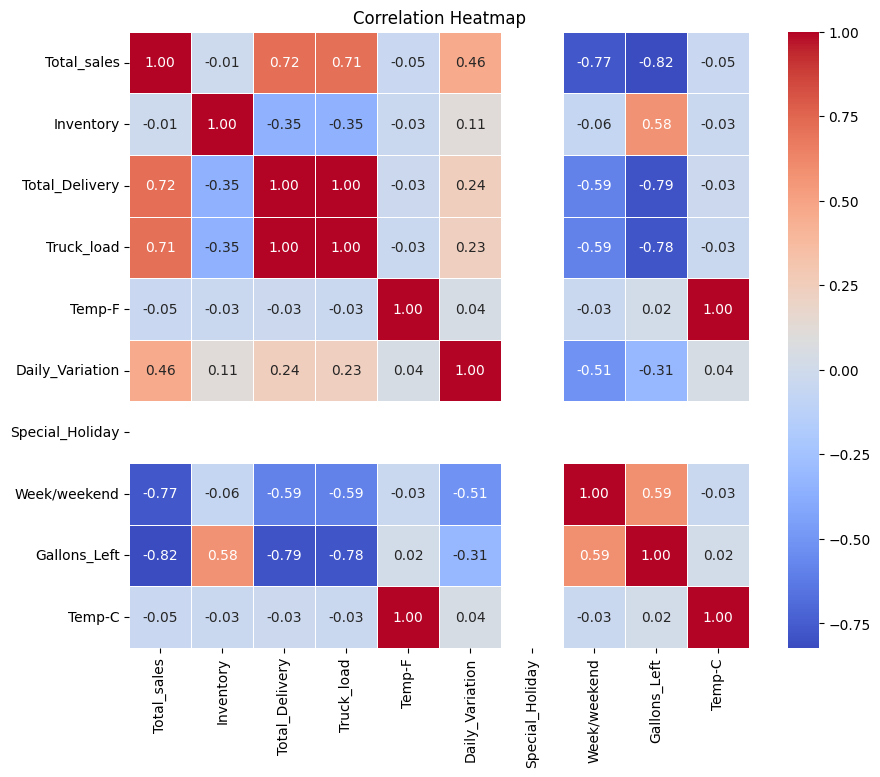

In [72]:
import seaborn as sns

numeric_columns = Final_df.select_dtypes(include=[np.number]).columns
correlation_matrix = Final_df[numeric_columns].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [73]:
import plotly.express as px
from bokeh.plotting import figure, output_file, show
import altair as alt
import networkx as nx
import holoviews as hv


# MONTHLY TREND ANALYSIS

In [75]:
import plotly.express as px

# Assuming 'Date' is in datetime format
Final_df['Date'] = pd.to_datetime(Final_df['Date'])
# Extract month from the date
Final_df['Month'] = Final_df['Date'].dt.month_name()

# Melt the DataFrame for small multiple time series plots
melted_df = pd.melt(Final_df, id_vars=['Date', 'Month'], value_vars=['Total_sales', 'Inventory', 'Truck_load', 'Gallons_Left'],
                    var_name='Variable', value_name='Value')

# Loop through each month and create a separate plot
for month in melted_df['Month'].unique():
    # Filter data for the specific month
    month_data = melted_df[melted_df['Month'] == month]

    # Create a line plot for each variable
    fig = px.line(month_data, x="Date", y="Value", color="Variable",
                  title=f"{month} - Monthly Trends", labels={"Value": "Variable Value", "Date": "Date"})

    # Add markers to the lines
    fig.update_traces(mode="markers+lines", marker=dict(size=8))

    # Show the figure
    fig.show()


C:\Users\Nagaraj Nagappan\AppData\Local\Temp\ipykernel_14048\553271589.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nagaraj Nagappan\AppData\Local\Temp\ipykernel_14048\553271589.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

